# 6.2 Exploring Relationships
## This Script contains following:
### 1. Import Visualization Libraries and Data
### 2. Data Cleaning
### 3. Remove Anomaly from Data
### 4. Explore Relationships
#### - Correlations - correlation matrix heatmap 
#### - Scatterplots
#### - Pair Plots
#### - Categorical Plots
### 5. Answer to Key Questions
### 6. New Questions to Explore
### 7. Hypothesis
### 8. Export Data

## 01. Importing Visualization Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__ ## Checking the version of matplotlib installed

'3.3.4'

In [3]:
%matplotlib inline

In [4]:
# define path
path = r'/Users/sudip/Desktop/DATA ANALYST/Projects/Project 6/Data'

In [5]:
# importing data
df = pd.read_csv(os.path.join(path, 'prepared_data', 'airbnb_berlin_cleaned.csv'), index_col = False)

## 02. Data Cleaning

In [6]:
df.shape

(13533, 17)

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'],
      dtype='object')

In [8]:
# renaming the columns with long names
df.rename(columns = {
    'neighbourhood_group':'district',
    'calculated_host_listings_count': 'host_total_listings',
    'number_of_reviews_ltm' : 'num_reviews_ltm'
}, inplace = True)

In [9]:
df.dtypes

Unnamed: 0               int64
id                       int64
name                    object
host_id                  int64
district                object
neighbourhood           object
latitude               float64
longitude              float64
room_type               object
price                    int64
minimum_nights           int64
number_of_reviews        int64
last_review             object
reviews_per_month      float64
host_total_listings      int64
availability_365         int64
num_reviews_ltm          int64
dtype: object

In [10]:
df.head()

,Unnamed: 0,id,name,host_id,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_total_listings,availability_365,num_reviews_ltm
0,0,39971294,Cozy flat with chimney,21565256,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50168,13.41573,Entire home/apt,50,1,2,2019-12-02,0.06,1,0,0
1,1,11934470,Bright Studio Apartment / 4th fl/ long term,62819516,Neukölln,Reuterstraße,52.49226,13.42937,Entire home/apt,43,30,5,2022-03-29,0.07,2,271,3
2,2,17580693,"Gemütliches, Zentrales Zimmer mit Blick ins Grüne",119416956,Mitte,Parkviertel,52.56151,13.35515,Private room,42,2,31,2022-03-07,0.50,1,10,4
3,4,17497917,BERLIN MITTE - hotspot - central & calm,5937313,Mitte,Alexanderplatz,52.52438,13.41012,Entire home/apt,106,2,116,2022-05-29,1.84,1,6,25
4,5,9924899,"Charming room in Kreuzberg, Graefekiez",4289187,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,52.49087,13.41712,Private room,39,3,7,2019-09-20,0.09,2,0,0


### Missing Value Checks

In [11]:
# checking for missing values
df.isnull().sum() # No missing values

Unnamed: 0             0
id                     0
name                   0
host_id                0
district               0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
last_review            0
reviews_per_month      0
host_total_listings    0
availability_365       0
num_reviews_ltm        0
dtype: int64

In [12]:
#Removing 'Unnamed' column as it is irrelevant for analysis.
df = df.drop("Unnamed: 0",axis=1)

In [13]:
df.dtypes

id                       int64
name                    object
host_id                  int64
district                object
neighbourhood           object
latitude               float64
longitude              float64
room_type               object
price                    int64
minimum_nights           int64
number_of_reviews        int64
last_review             object
reviews_per_month      float64
host_total_listings      int64
availability_365         int64
num_reviews_ltm          int64
dtype: object

## 03. Removing Anomaly from Data

In [14]:
# observing the statistical values of price
df['price'].describe()

count    13533.000000
mean        84.987955
std         94.375962
min          0.000000
25%         40.000000
50%         60.000000
75%         99.000000
max       4060.000000
Name: price, dtype: float64

### Remove  Price greater than 3 Standard Deviation

In [15]:
# filtering the price below 3 std
std = df['price'].std()
std_3 = 3*std

df_filtered= df[df['price'] <= std_3]
df_filtered.shape

(13187, 16)

## 04. Exploring Relationships

### Correlations

In [16]:
# creating subset 
sub = df_filtered[[
    'price', 'minimum_nights', 'number_of_reviews','reviews_per_month',
    'host_total_listings','availability_365','num_reviews_ltm'
]]

In [17]:
# Creating a correlation matrix using pandas
sub.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,host_total_listings,availability_365,num_reviews_ltm
price,1.000000,-0.044976,0.141624,0.211658,0.274861,0.382660,0.179805
minimum_nights,-0.044976,1.000000,-0.025162,-0.054514,0.036473,0.138844,-0.052279
number_of_reviews,0.141624,-0.025162,1.000000,0.660993,0.063780,0.243298,0.647133
reviews_per_month,0.211658,-0.054514,0.660993,1.000000,0.085109,0.281953,0.875232
host_total_listings,0.274861,0.036473,0.063780,0.085109,1.000000,0.352736,0.083518
availability_365,0.382660,0.138844,0.243298,0.281953,0.352736,1.000000,0.243229
num_reviews_ltm,0.179805,-0.052279,0.647133,0.875232,0.083518,0.243229,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

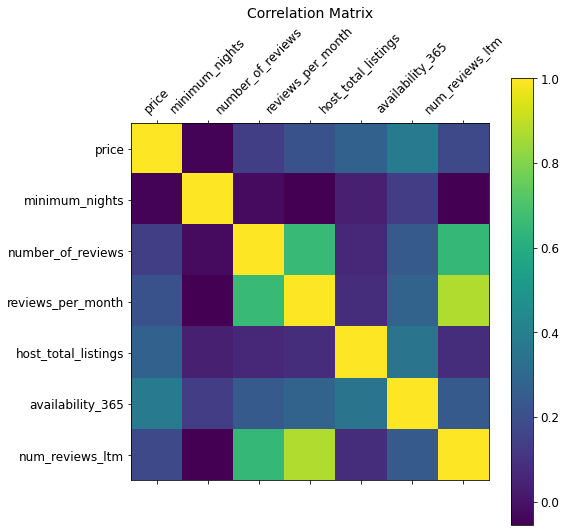

In [18]:
# creating correlation heatmap using matplotlib
# Adding labels, a legend, and change the size of the heatmap
f = plt.figure(figsize = (8,8)) # figure size
plt.matshow(sub.corr(), fignum = f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize = 12, rotation = 45 ) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize = 12) # y axis labels
cb = plt. colorbar() # add a color legend called colorbar
cb.ax.tick_params(labelsize = 12) # add font size
plt.title('Correlation Matrix', fontsize = 14) # add title

## Create a correlation heatmap using seaborn:

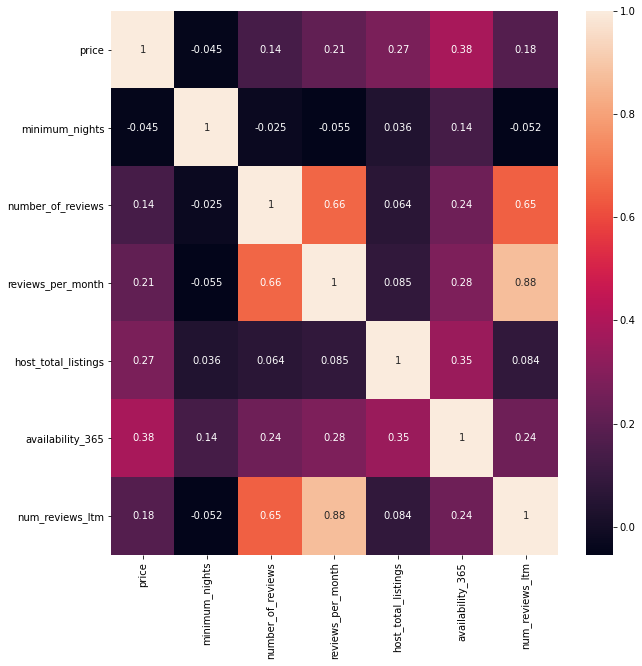

In [19]:
# create a subplot with matplotlib
f,ax = plt.subplots(figsize = (10,10))
# creating correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### Based on the heatmap above, I am quite interested in exploring what variables may impact the price of each listing in Airbnb. While the correlations of price with other variables are not very strong, we see that price is most likely correlated to "availability_365" (0.39), "host_total_listing" (0.27), and the "reviews_per_month" (0.21).
#### Overall, many of the variables have fairly low correlation with one another based on the above table. However, as expected, the number_of_reviews as well as the reviews_per_month are highly correlated with another, which makes sense as they are dependent upon each other.

### Scatterplots

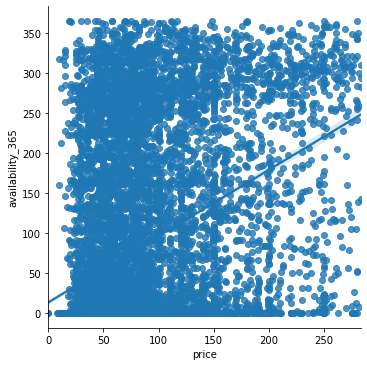

In [20]:
# create a scatterplot for the 'price' and 'availability_365' columns in seaborn to determine 
# if they have any relationship 
sns.lmplot(x = 'price', y = 'availability_365', data = df_filtered)

In [21]:
# creating sample for the dataframe to visualize the relationship more clearly.
sample_size = int(len(df_filtered)*0.2)
df_sample = df_filtered.sample(sample_size)

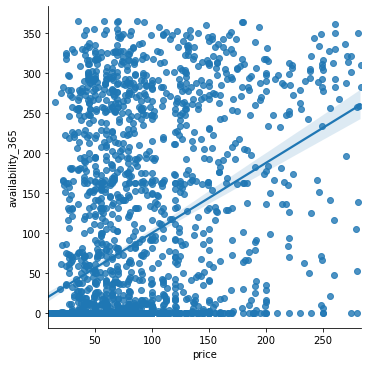

In [22]:
sns.lmplot(x = 'price', y = 'availability_365', data = df_sample)

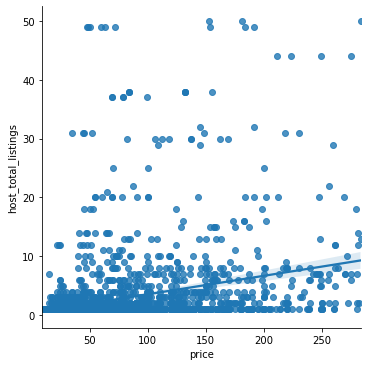

In [23]:
# Creating a scatterplot for price and host_total_listings to determine if they have any relationship 
sns.lmplot(x= 'price', y = 'host_total_listings', data = df_sample)

#### The price and availability_365 variables have a moderate positive relationship, as one increases, the other will also increase. Further, price and host_total_listings also have a moderate positive relationship, as one increases, the other will also increase. 

## Pair Plot

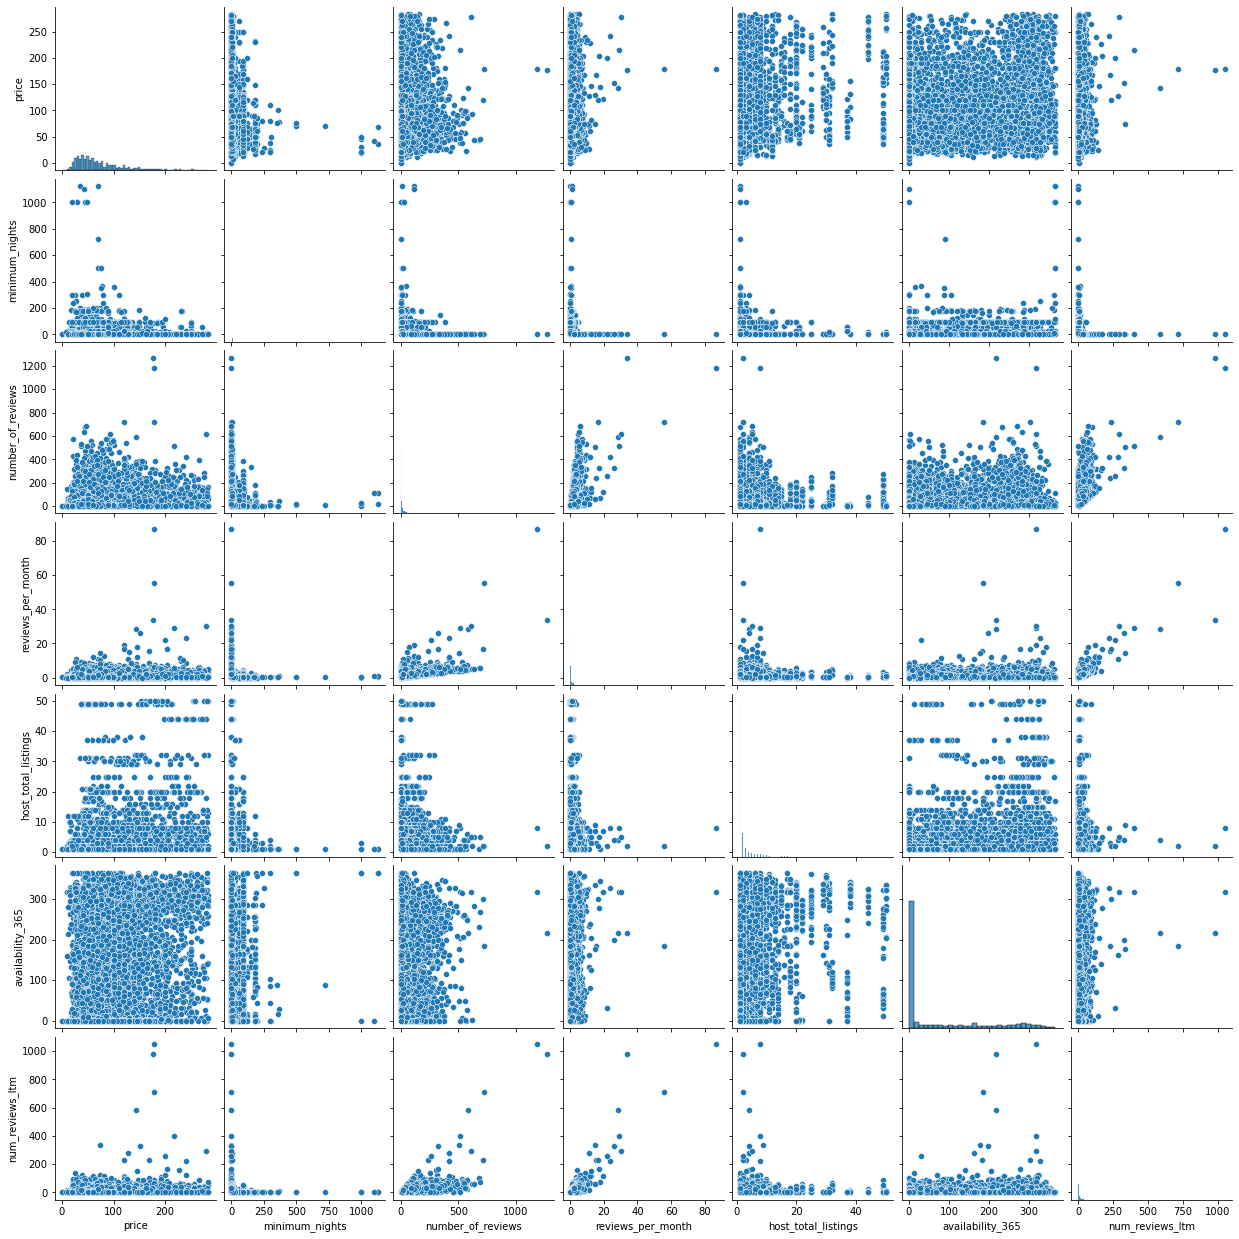

In [24]:
# creating pair plot of entire data set
g = sns.pairplot(sub)

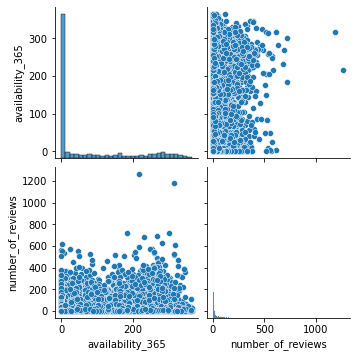

In [25]:
# creating pair plot of availability_365 and number_of reviews
#creating subset
sub_2 = sub[['availability_365', 'number_of_reviews']]
#creating pairplot
g = sns.pairplot(sub_2)

From the above pair plots, we can see that listings with lower prices have more reviews_per_month, most likely as they may be more affordable for the average customer.

Further, the level of availability of listing has no significant relationship with the number of reviews.

## Categorical Plots:

### Creating a categorical variable that splits the "Price" column into categories

<AxesSubplot:xlabel='price', ylabel='Count'>

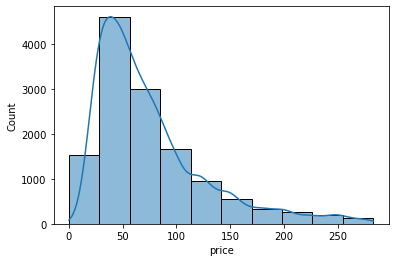

In [28]:
# using histgram to visualize the distribution of variables
sns.histplot(df_filtered['price'], bins= 10, kde = True)

In [30]:
# Determining the quartile ranges of the 'price' variable 
df_filtered.price.quantile([0.25,0.5,0.75])

0.25    39.0
0.50    60.0
0.75    95.0
Name: price, dtype: float64

In [31]:
df_filtered.loc[df_filtered['price'] < 39, 'price_category'] = 'low_price'

/Users/sudip/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/sudip/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [33]:
df_filtered.loc[(df_filtered['price'] >= 39) &(df_filtered['price'] < 95), 'price_category'] = 'medium_price'

/Users/sudip/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [34]:
df_filtered.loc[df_filtered['price'] >= 95, 'price_category'] = 'high_price'

/Users/sudip/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [35]:
df_filtered['price_category'].value_counts(dropna = False)

medium_price    6651
high_price      3348
low_price       3188
Name: price_category, dtype: int64

In [36]:
df_filtered.columns

Index(['id', 'name', 'host_id', 'district', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'host_total_listings', 'availability_365', 'num_reviews_ltm',
       'price_category'],
      dtype='object')

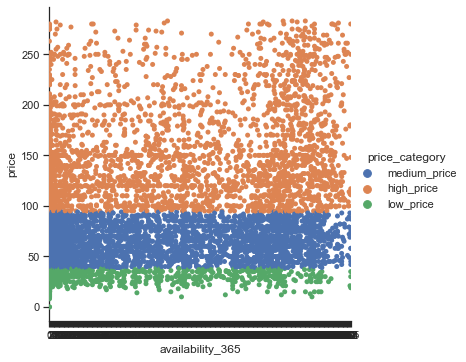

In [37]:
# Creating a categorical plot in seaborn using the price categories
sns.set(style = 'ticks')
g = sns. catplot(x ='availability_365', y = 'price', hue = 'price_category', data = df_filtered)

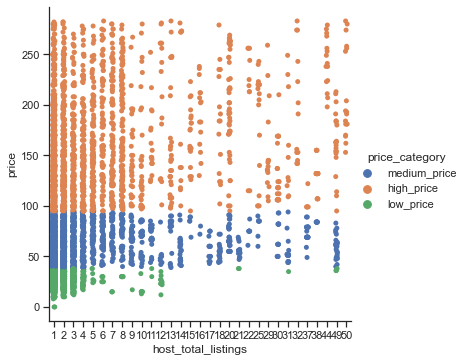

In [38]:
# Creating a categorical plot in seaborn using the price categories
sns.set(style="ticks")
g = sns.catplot(x="host_total_listings", y="price", hue="price_category", data=df_filtered)

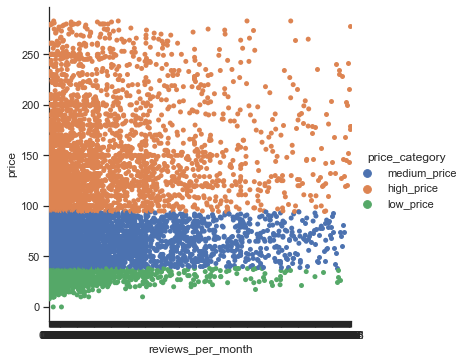

In [39]:
# Creating a categorical plot in seaborn using the price categories 
sns.set(style="ticks")
g = sns.catplot(x="reviews_per_month", y="price", hue="price_category", data=df_filtered)

## 05. Answer to Key Question
### Is there any relationship between no. of reviews in Airbnb and availability of the listing?
Answer: From above pair plot, we can see that there is no significant relatioship between no. of reviews in Airbnb and availability of the listing.

## 06. New Questions to Explore
Is there any relationship between the price and distance of Listings from the center of Berlin?

Is there any relationship between the price and room type in the Listing?

## 07. Hypothesis
1. If the listing is closer to the center, price gets higher.
2. If number of amenities in the listing is higher, the review_score_value will be higher.
3. If review_scores_cleanliness of the listing is higher, price gets higher.

## 08. Exporting Data

In [41]:
#exporting the dataset as csv file
df_filtered.to_csv(os.path.join(path, 'prepared_data', 'airbnb_berlin_cleaned_2.csv'))